In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

In [26]:
data = yf.download("EURUSD=X USDJPY=X EURGBP=X AUDUSD=X AUDNZD=X AUDCAD=X GBPCHF=X NZDCHF=X USDCAD=X",
                   start="2020-01-01",end="2022-01-01")

[*********************100%***********************]  9 of 9 completed


In [32]:
data

Adj Close                                                  \
            AUDCAD=X  AUDNZD=X  AUDUSD=X EURGBP=X  EURUSD=X GBPCHF=X   
Date                                                                   
2020-01-01  0.911000  1.040872  0.701700  0.84620  1.122083  1.28270   
2020-01-02  0.910702  1.041830  0.701951  0.84657  1.122083  1.28219   
2020-01-03  0.906809  1.042280  0.698519  0.84950  1.117144  1.27719   
2020-01-06  0.901861  1.043368  0.694420  0.85329  1.116196  1.27053   
2020-01-07  0.899240  1.040110  0.693731  0.84998  1.119799  1.27551   
...              ...       ...       ...      ...       ...      ...   
2021-12-27  0.926514  1.060650  0.723129  0.84465  1.132426  1.23150   
2021-12-28  0.925250  1.061162  0.723700  0.84278  1.133003  1.23242   
2021-12-29  0.926300  1.061800  0.723400  0.84188  1.131478  1.23185   
2021-12-30  0.927770  1.061221  0.725879  0.84140  1.136015  1.23327   
2021-12-31  0.923600  1.061360  0.724980  0.83855  1.132503  1.23307   

                                              Close  ...        Open   Volume  \
            NZDCHF=X USDCAD=X    USDJPY=X  AUDCAD=X  ...    USDJPY=X AUDCAD=X   
Date                                                 ...                        
2020-01-01  0.650894  1.30020  108.681000  0.911000  ...  108.680000        0   
2020-01-02  0.651750  1.29730  108.712997  0.910702  ...  108.713997        0   
2020-01-03  0.650400  1.29830  108.542999  0.906809  ...  108.540001        0   
2020-01-06  0.646370  1.29866  107.963997  0.901861  ...  107.999001        0   
2020-01-07  0.645500  1.29639  108.405998  0.899240  ...  108.411003        0   
...              ...      ...         ...       ...  ...         ...      ...   
2021-12-27  0.625750  1.28140  114.333000  0.926514  ...  114.337997        0   
2021-12-28  0.625010  1.27870  114.792000  0.925250  ...  114.788002        0   
2021-12-29  0.623800  1.28130  114.773003  0.926300  ...  114.766998        0   
2021-12-30  0.624910  1.27826  114.947998  0.927770  ...  114.957001        0   
2021-12-31  0.624050  1.27444  115.063004  0.923600  ...  115.058998        0   

                                                                           \
           AUDNZD=X AUDUSD=X EURGBP=X EURUSD=X GBPCHF=X NZDCHF=X USDCAD=X   
Date                                                                        
2020-01-01        0        0        0        0        0        0        0   
2020-01-02        0        0        0        0        0        0        0   
2020-01-03        0        0        0        0        0        0        0   
2020-01-06        0        0        0        0        0        0        0   
2020-01-07        0        0        0        0        0        0        0   
...             ...      ...      ...      ...      ...      ...      ...   
2021-12-27        0        0        0        0        0        0        0   
2021-12-28        0        0        0        0        0        0        0   
2021-12-29        0        0        0        0        0        0        0   
2021-12-30        0        0        0        0        0        0        0   
2021-12-31        0        0        0        0        0        0        0   

                     
           USDJPY=X  
Date                 
2020-01-01        0  
2020-01-02        0  
2020-01-03        0  
2020-01-06        0  
2020-01-07        0  
...             ...  
2021-12-27        0  
2021-12-28        0  
2021-12-29        0  
2021-12-30        0  
2021-12-31        0  

[523 rows x 54 columns]

In [33]:
df=data.Close.pct_change()

In [34]:
df

,AUDCAD=X,AUDNZD=X,AUDUSD=X,EURGBP=X,EURUSD=X,GBPCHF=X,NZDCHF=X,USDCAD=X,USDJPY=X
Date,,,,,,,,,
2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,-0.000327,0.000920,0.000358,0.000437,0.000000,-0.000398,0.001315,-0.002230,0.000294
2020-01-03,-0.004275,0.000432,-0.004890,0.003461,-0.004401,-0.003900,-0.002071,0.000771,-0.001564
2020-01-06,-0.005456,0.001044,-0.005868,0.004461,-0.000848,-0.005215,-0.006196,0.000277,-0.005334
2020-01-07,-0.002906,-0.003123,-0.000992,-0.003879,0.003228,0.003920,-0.001346,-0.001748,0.004094
...,...,...,...,...,...,...,...,...,...
2021-12-27,-0.001063,0.000500,-0.000265,0.000308,-0.000272,0.000000,-0.000878,-0.000772,-0.001092
2021-12-28,-0.001364,0.000483,0.000790,-0.002214,0.000510,0.000747,-0.001183,-0.002107,0.004015
2021-12-29,0.001135,0.000601,-0.000415,-0.001068,-0.001346,-0.000462,-0.001936,0.002033,-0.000165


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 523 entries, 2020-01-01 to 2021-12-31
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   AUDCAD=X  522 non-null    float64
 1   AUDNZD=X  522 non-null    float64
 2   AUDUSD=X  522 non-null    float64
 3   EURGBP=X  522 non-null    float64
 4   EURUSD=X  522 non-null    float64
 5   GBPCHF=X  522 non-null    float64
 6   NZDCHF=X  522 non-null    float64
 7   USDCAD=X  522 non-null    float64
 8   USDJPY=X  522 non-null    float64
dtypes: float64(9)
memory usage: 40.9 KB


In [36]:
df = df.iloc[1:]

In [37]:
df

,AUDCAD=X,AUDNZD=X,AUDUSD=X,EURGBP=X,EURUSD=X,GBPCHF=X,NZDCHF=X,USDCAD=X,USDJPY=X
Date,,,,,,,,,
2020-01-02,-0.000327,0.000920,0.000358,0.000437,0.000000,-0.000398,0.001315,-0.002230,0.000294
2020-01-03,-0.004275,0.000432,-0.004890,0.003461,-0.004401,-0.003900,-0.002071,0.000771,-0.001564
2020-01-06,-0.005456,0.001044,-0.005868,0.004461,-0.000848,-0.005215,-0.006196,0.000277,-0.005334
2020-01-07,-0.002906,-0.003123,-0.000992,-0.003879,0.003228,0.003920,-0.001346,-0.001748,0.004094
2020-01-08,-0.008385,-0.005317,-0.011087,0.000647,-0.003863,-0.004085,-0.004973,0.003024,-0.003598
...,...,...,...,...,...,...,...,...,...
2021-12-27,-0.001063,0.000500,-0.000265,0.000308,-0.000272,0.000000,-0.000878,-0.000772,-0.001092
2021-12-28,-0.001364,0.000483,0.000790,-0.002214,0.000510,0.000747,-0.001183,-0.002107,0.004015
2021-12-29,0.001135,0.000601,-0.000415,-0.001068,-0.001346,-0.000462,-0.001936,0.002033,-0.000165


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 522 entries, 2020-01-02 to 2021-12-31
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   AUDCAD=X  522 non-null    float64
 1   AUDNZD=X  522 non-null    float64
 2   AUDUSD=X  522 non-null    float64
 3   EURGBP=X  522 non-null    float64
 4   EURUSD=X  522 non-null    float64
 5   GBPCHF=X  522 non-null    float64
 6   NZDCHF=X  522 non-null    float64
 7   USDCAD=X  522 non-null    float64
 8   USDJPY=X  522 non-null    float64
dtypes: float64(9)
memory usage: 40.8 KB


<AxesSubplot:>

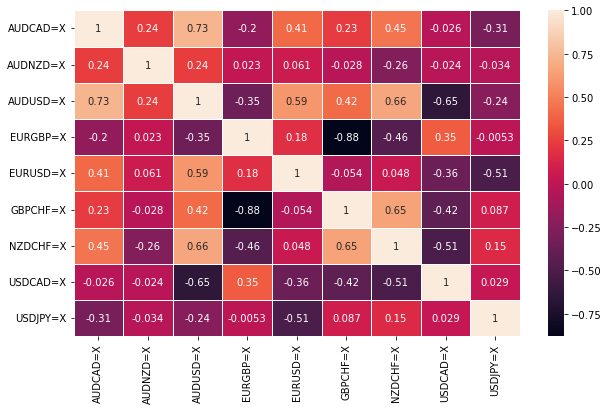

In [39]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,6))  
sns.heatmap(corr,
           xticklabels = corr.columns,
           yticklabels=corr.columns, annot=True,linewidths=.5)

array([[<AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>]], dtype=object)

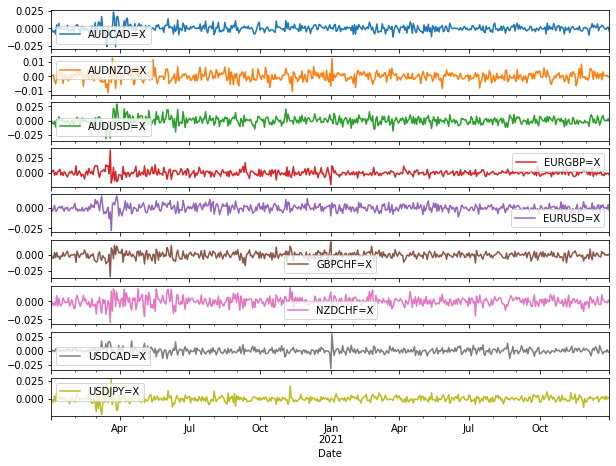

In [40]:
df.plot(subplots=True,layout=(12,1),figsize=(10,10))

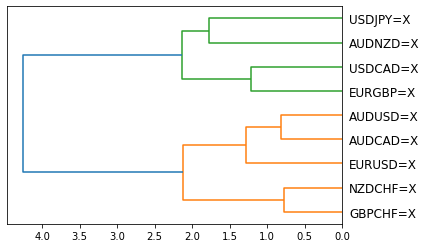

In [41]:
linked = linkage(corr,'ward')

labelList = df.columns.to_list()

plt.figure()
dendrogram(linked,
         orientation= 'left',
         labels=labelList,
          leaf_rotation=0)
plt.show()

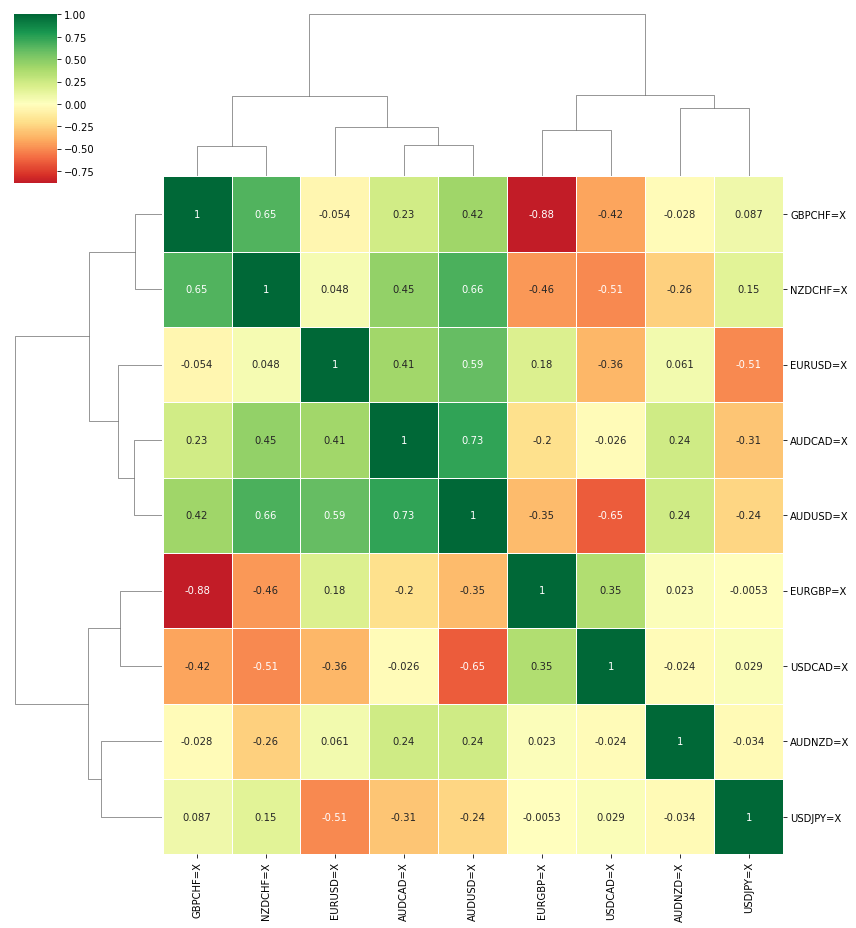

In [42]:
g = sns.clustermap(df.corr(), method='ward', center = 0.0, cmap="RdYlGn",
                   dendrogram_ratio=(.2, .2),
                   linewidths=.75, figsize=(12, 13),
                   annot = True)

In [43]:
group1 = df[['EURUSD=X' , 'AUDUSD=X','USDJPY=X','AUDNZD=X']]
group2 = df[['GBPCHF=X','NZDCHF=X','EURUSD=X','AUDCAD=X','AUDUSD=X']]


In [44]:
group1_geo_ret = (group1+1).cumprod()
group2_geo_ret = (group2+1).cumprod()

<AxesSubplot:xlabel='Date'>

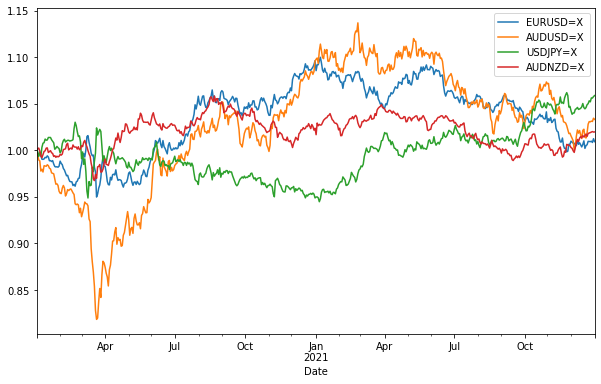

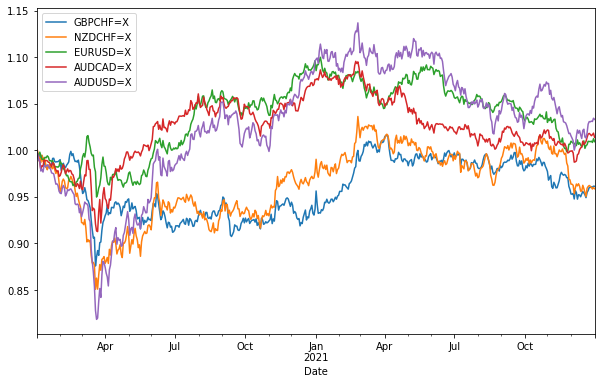

In [45]:
#หาหุ้นเพื่อนทิ้ง ดูตัวที่อาจจะเคลื่อนตามกลุ่มอื่นไม่ทันแล้วซื้อตาม
group1_geo_ret.plot(figsize=(10,6))
group2_geo_ret.plot(figsize=(10,6))